# Time Series Models - PAMAP2 DataSet
We will walkthroug first time series models, and exploring the PAMAP2 DataSet.  Link To PAMAP2 dataset - https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring  

### About The Data Set: 
> The PAMAP2 Physical Activity Monitoring dataset contains data of 18 different physical activities (such as walking, cycling, playing soccer, etc.), performed by 9 subjects wearing 3 inertial measurement units and a heart rate monitor. The dataset can be used for activity recognition and intensity estimation, while developing and applying algorithms of data processing, segmentation, feature extraction and classification

## Imports For This Note Book

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Input, LSTM, Dropout

# Loading Always Comes First
In this section we will load the data from the data set. 
* load_activity_map - get the map of humen acctivities describe in the data set
* generate_three_IMU - genetrate 3 columns of x, y, z data
* generate_four_IMU - genetrate 4 columns of x, y, z, w data
* generate_cols_IMU - for a given name generate 5 columns of the sensors as describe in the data set (accelmoter 16, 6, gyroscope, magnometer and orentaion
* load_IMU - load all 52 columns of a subject in the data set
* load_subjects - load all subjects from a given root

In [ ]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [ ]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


* As we can see we have NaN in our data, so we need to change their value. We will take every NaN value and eplace it with the mean value of the column.
* Also, we can note from the map that acitvity_id = 0 is not an valid activity

In [ ]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    # fill all the NaN values in a coulmn with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

data = fix_data(data)

# 1) a. Exploratory DataSet from Documentation:

![image.png](attachment:image.png)


Activity analysis for all the subjects 

![image.png](attachment:image.png)

Subjects details

In [ ]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


# Element Analysis 

In [ ]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Size of the data:  106857960
Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  12


# 1) b. Balance Analysis
check for each subject if there equal number of sampels

In [ ]:
def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()
    

<ipython-input-9-665e0abf7105>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


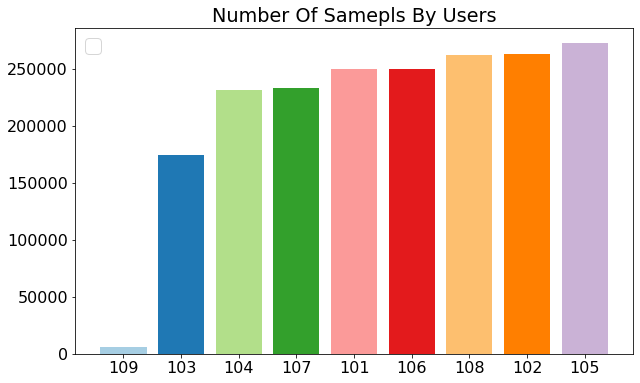

In [ ]:
sampels = data.groupby(['id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['id'] = sampels['id']
sampels_to_subject['sampels'] = sampels['time_stamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
pd_fast_plot(sampels_to_subject,'sampels','id','Number Of Samepls By Users')

<ipython-input-9-665e0abf7105>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


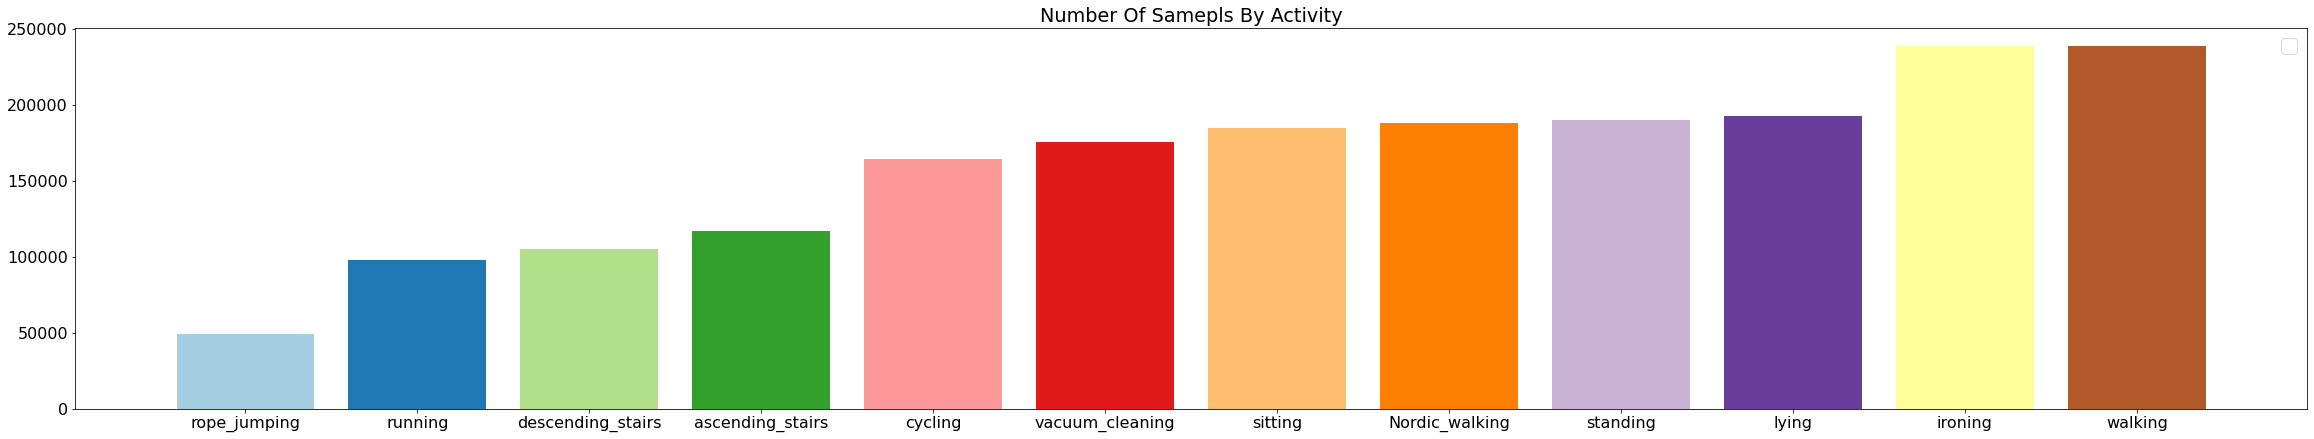

In [ ]:
map_ac = load_activity_map()
sampels = data.groupby(['activity_id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [map_ac[x] for x in sampels['activity_id']]
sampels_to_subject['sampels'] = sampels['time_stamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
pd_fast_plot(sampels_to_subject,'sampels','activity','Number Of Samepls By Activity',figsize=(40,7))

We can see the data isn't balenced:
* Subject 109 as less sampels then all others subjects.
* rope_jumping activity as less sampels then other activities 

## Heart Rate Anlysis

<ipython-input-9-665e0abf7105>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


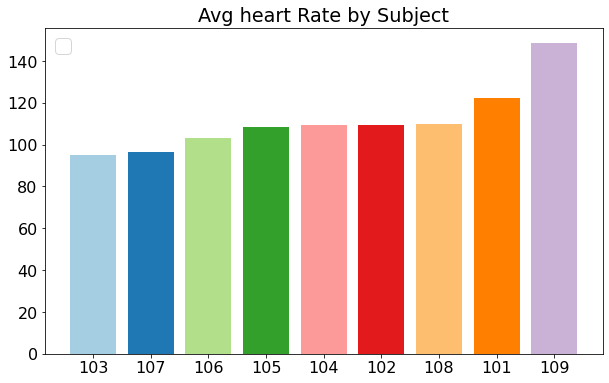

In [ ]:
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['id'] = result_id['id']
sampels_heart_rate['heart_rate'] = result_id['heart_rate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(sampels_heart_rate,'heart_rate','id','Avg heart Rate by Subject')

<ipython-input-9-665e0abf7105>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])


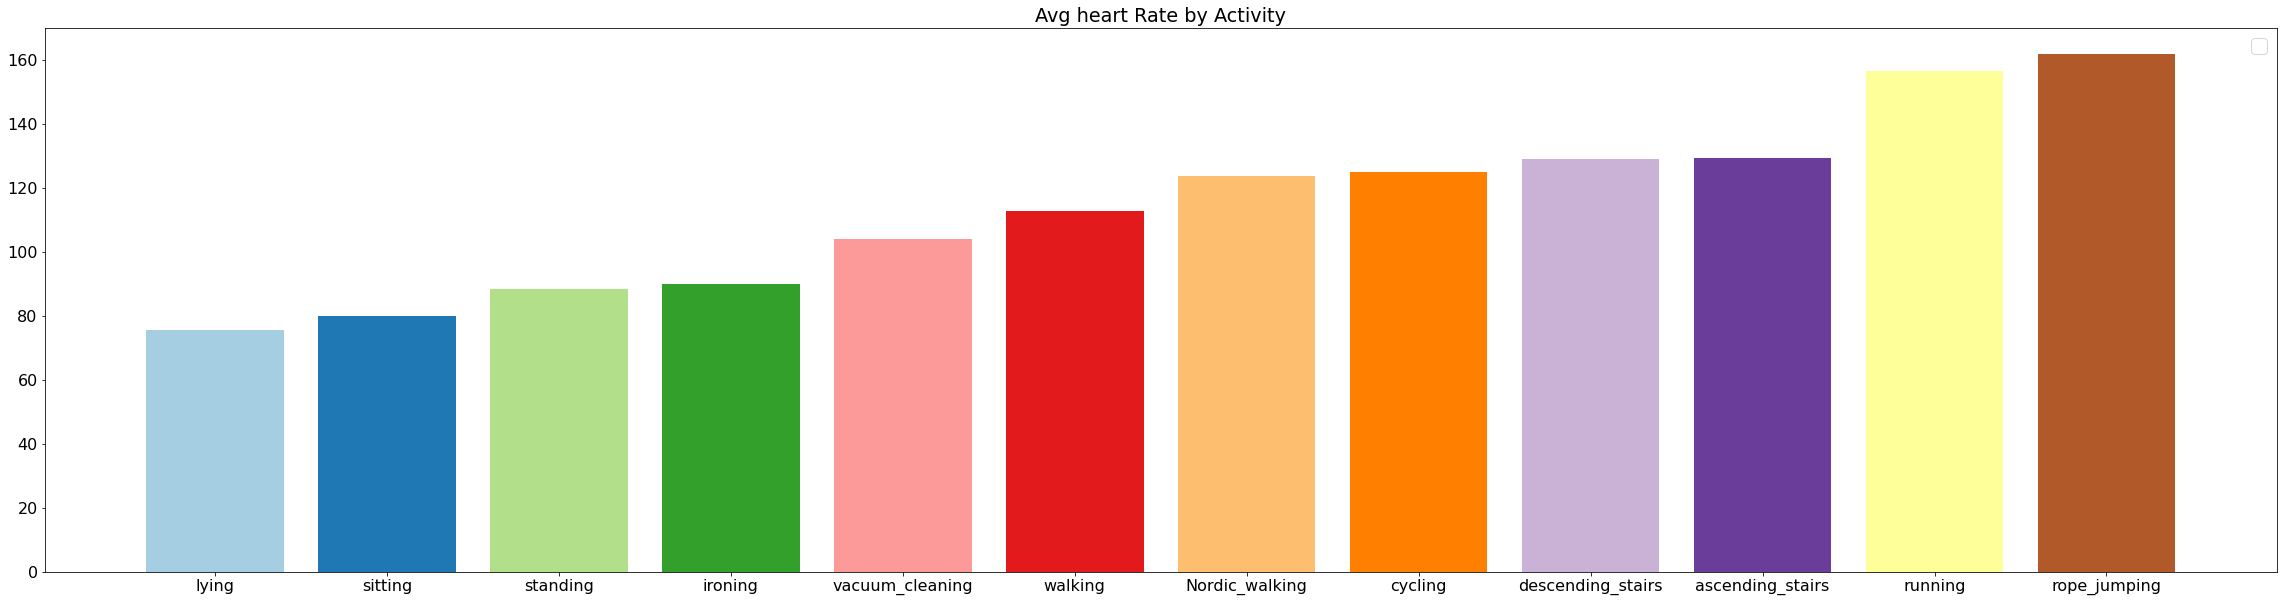

In [ ]:
map_ac = load_activity_map()
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['activity'] = [map_ac[x] for x in result_act['activity_id']]
sampels_heart_rate['heart_rate'] = result_act['heart_rate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heart_rate'])
pd_fast_plot(sampels_heart_rate,'heart_rate','activity','Avg heart Rate by Activity',figsize=(40,10))

we can see subject 109 as the higest heart rate, and activity lying as the smallest heart rate

## Tempature Analysis

<ipython-input-14-e96c4818436d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


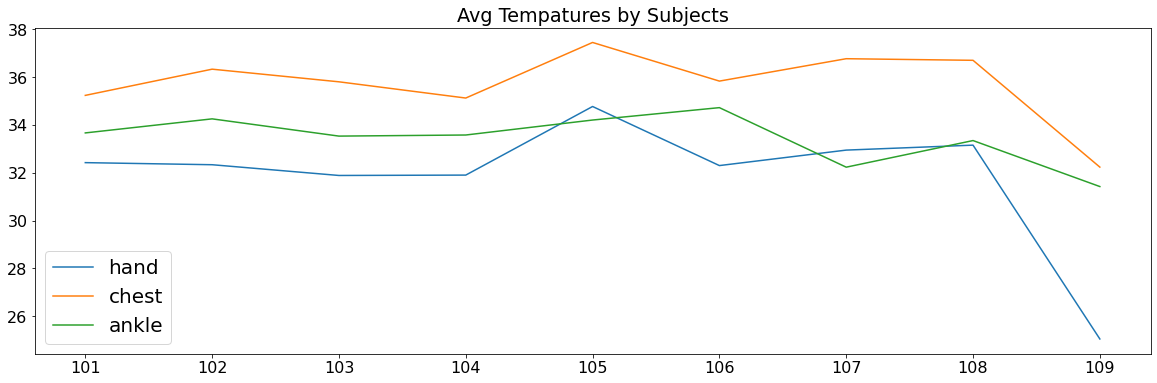

In [ ]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = result_id['hand_temperature']
samepls_tempreture['chest'] = result_id['chest_temperature']
samepls_tempreture['ankle'] = result_id['ankle_temperature']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

<ipython-input-15-573d0856e735>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(samepls_tempreture['activity'])


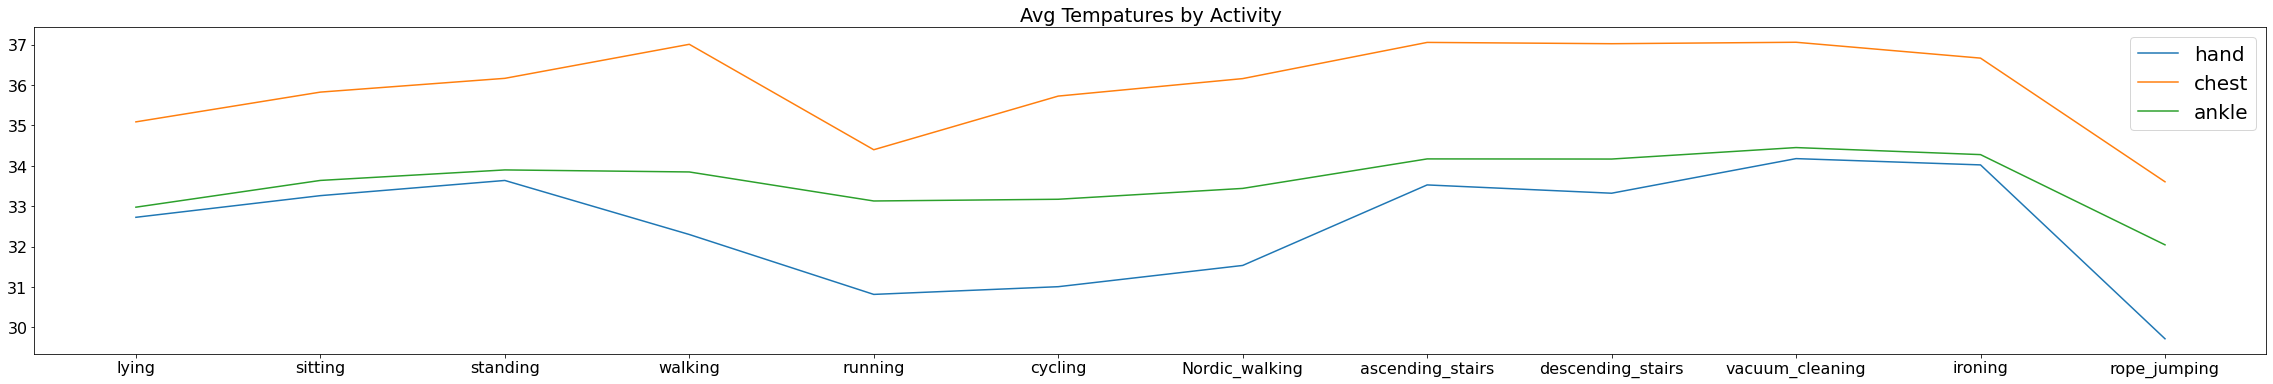

In [ ]:
map_ac = load_activity_map()
samepls_tempreture = pd.DataFrame()
samepls_tempreture['activity'] = [map_ac[x] for x in result_act['activity_id']]
samepls_tempreture['hand'] = result_act['hand_temperature']
samepls_tempreture['chest'] = result_act['chest_temperature']
samepls_tempreture['ankle'] = result_act['ankle_temperature']

ax = samepls_tempreture.plot(kind='line', figsize=(40,6), title='Avg Tempatures by Activity')
a = ax.set_xticklabels(samepls_tempreture['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

we can see that suject 109 as the lowest tempetures in all the parts of the humen body that were measured, And the lowest activity temptures is rope_jumping

## Sensor Analysis

<ipython-input-16-99a6b8a155c0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['id'])


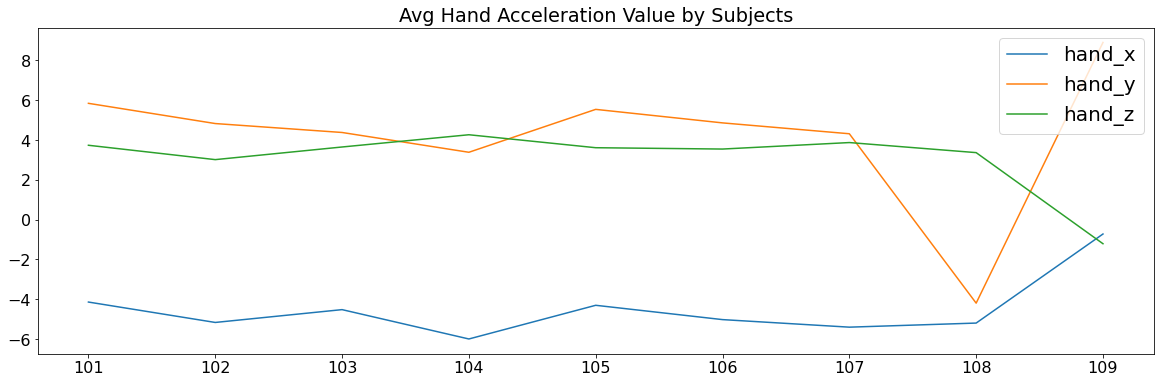

In [ ]:
samepls = pd.DataFrame()
samepls['hand_x'] = result_id['hand_3D_acceleration_16_x']
samepls['hand_y'] = result_id['hand_3D_acceleration_16_y']
samepls['hand_z'] = result_id['hand_3D_acceleration_16_z']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Hand Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))

we can see that almost all the subjects hand sensor are acting the same however there is somthing strang in subject 108 y value of his hand sensor?

As we can see our problem is classification we are trying to predict for a given time and values of the sensors the activity

## 1) c. In time serice we are going to use self-supervised. 
### Exampels of Self-Supervised Tasks: 
   * Predicting the future from the past: We can create new features based by old features. In our case this is the sliding window of the lookback in the prev features to predict the upcoming value.
   * Predicting the past from the present: Same as the above however now the prediction is on the past and not the future.
   * Adjusting the model to predict simple target - In our case making the target simple as we can so it will be more easly to predict it, in our case prediction of the next activity by a given values.

## 2) a. Selecting a validation strategy - train,test split
we can see that subject 107, 108 are having the most measurments in all activities, we will take them as our test train.
As Part of our spliting we will use min_max_scaler tahat takes all column in the data set and rescaling them between 0 to 1, for getting better results more quickly.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def split_train_test(data):
    # create the test data
    subject107 = data[data['id'] == 107]
    subject108 = data[data['id'] == 108]
    test = subject107.append(subject108)

    # create the train data
    train = data[data['id'] != 107]
    train = data[data['id'] != 108]

    # drop the columns id and time
    test = test.drop(["id"], axis=1)
    train = train.drop(["id"], axis=1)

    # split train and test to X and y
    X_train = train.drop(['activity_id','time_stamp'], axis=1).values
    X_test = test.drop(['activity_id','time_stamp'], axis=1).values
    
    # make data scale to min max beetwin 0 to 1
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_train)
    min_max_scaler.fit(X_test)
    X_train = min_max_scaler.transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    
    y_train = train['activity_id'].values
    y_test = test['activity_id'].values
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(data)
print('Train shape X :',X_train.shape,' y ', y_train.shape)
print('Test shape X :',X_test.shape,' y ', y_test.shape)

Train shape X : (1680770, 52)  y  (1680770,)
Test shape X : (494878, 52)  y  (494878,)


## 2) b. Creating Naive Solution for the problem using Logistic Regression

### Pre-processing the data - we will use base line of grouping all the data by activities

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def base_line_preprocess(data):
    train = data.groupby('activity_id')
    X_base = train.mean().reset_index().drop(['activity_id','id','time_stamp'],axis=1).values
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(X_base)
    X_base = min_max_scaler.transform(X_base)
    y_base = np.array(train['activity_id'].unique().explode().values).astype('float64')
    return X_base, y_base

X_base, y_base = base_line_preprocess(data)
print('X base shape: ', X_base.shape)
print('y base shape: ', y_base.shape)


X base shape:  (12, 52)
y base shape:  (12,)


Training and Fitting Logistic Regression 

In [ ]:
reg = LogisticRegression()
reg.fit(X_base, y_base)
preds = reg.predict(X_train)
print('Logistic regression accuracy on train: ', accuracy_score(y_train,preds)*100)
preds = reg.predict(X_test)
print('Logistic regression accuracy on test: ', accuracy_score(y_test,preds)*100)

Logistic regression accuracy on train:  42.729820260951826
Logistic regression accuracy on test:  33.45228520968804


The results of the model are great for a bench mark, however we will try Desicision Tree as our Ml model

## 2) c. Creating a Bench Mark using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# predict on the train and the test
preds = dt.predict(X_train)
print('Decision Tree Regressor accuracy on train: ', accuracy_score(y_train,preds)*100)
preds = dt.predict(X_test)
print('Decision Tree Regressor accuracy on test: ', accuracy_score(y_test,preds)*100)
preds = 0

Decision Tree Regressor accuracy on train:  100.0
Decision Tree Regressor accuracy on test:  57.11650144075914



## 2) d. Building NN Model Using LSTM

### Pre-processing the data using a sliding window

In [ ]:
def create_lstm_data(X, y, step_back = 5, step_forword = 1):
    out_X = []
    out_y = []
    size = len(X)
    for i, features in enumerate(X):
        if i >= step_back and i < size - step_forword:
            tmp_X = []
            tmp_y = []
            for j in range(i-step_back,i):
                tmp_X.extend([X[j]])
            out_X.append(tmp_X)
            for j in range(i,i+step_forword):
                tmp_y.extend([y[j]])
            out_y.append(tmp_y)
    return np.array(out_X), np.array(out_y)

X_lstm_train, y_lstm_train = create_lstm_data(X_train, y_train)
X_lstm_test, y_lstm_test = create_lstm_data(X_test, y_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
hot.fit(y_lstm_train)
hot.fit(y_lstm_test)

y_lstm_train = hot.transform(y_lstm_train)
y_lstm_test = hot.transform(y_lstm_test)

In [ ]:
print('Train shape X lstm :',X_lstm_train.shape,' y ', y_lstm_train.shape)
print('Test shape X lstm :',X_lstm_test.shape,' y ', y_lstm_test.shape)


Train shape X lstm : (1680764, 5, 52)  y  (1680764, 12)
Test shape X lstm : (494872, 5, 52)  y  (494872, 12)


As we can see we are tryin to predict from a past 5 times activities the next time activity

### LSTM model:

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(6,input_shape=(X_lstm_train.shape[1],X_lstm_train.shape[2])))
lstm_model.add(Dense(16 ,activation='relu'))
lstm_model.add(Dense(y_lstm_train.shape[1], activation='softmax'))

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 1416      
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split = 0.2 , epochs = 10, callbacks=[early_stopping_monitor])

Epoch 1/10
42020/42020 [==============================] - 234s 5ms/step - loss: 0.3976 - accuracy: 0.8621 - val_loss: 3.7621 - val_accuracy: 0.4790
Epoch 2/10
42020/42020 [==============================] - 240s 6ms/step - loss: 0.1933 - accuracy: 0.9341 - val_loss: 5.6863 - val_accuracy: 0.4882
Epoch 3/10
42020/42020 [==============================] - 237s 6ms/step - loss: 0.1542 - accuracy: 0.9473 - val_loss: 7.0490 - val_accuracy: 0.4666
Epoch 4/10
42020/42020 [==============================] - 222s 5ms/step - loss: 0.1304 - accuracy: 0.9560 - val_loss: 8.5302 - val_accuracy: 0.4131


In [ ]:
# taken from https://keras.io/visualization/
def quick_plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

quick_plot_history(history)

We can see that our model is overfitting, as in the graphs the validationn set loss.

In [ ]:
y = y_test[5:-1]
preds = lstm_model.predict(X_lstm_test)
preds_cat = np.argmax(preds,axis=1)
# building a map of result to activity
result = np.unique(preds_cat).tolist() 
expected = np.unique(y).tolist() 
combined = list(zip(result,expected))
conf_map = dict(combined)
# transfoms the prediction to an activity
results = [conf_map[x] for x in preds_cat]
print('model accuracy on test :',accuracy_score(y,results)*100)

This is a lower result then the ML Desicion Tree Regressor 

In [ ]:
def quick_plot_con_matrix(y, results,labels):
    # now print confusion metrix
    con = confusion_matrix(y,results)
    a = plt.figure(figsize=(25,15), dpi=50)
    a = sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
    a = plt.rcParams.update({'font.size': 20})
    a = plt.title('Confusion Matrix')
    a = plt.xlabel('Predictions')
    a = plt.ylabel('Accpected')

activity_map = load_activity_map()
labels = [activity_map[conf_map[x]] for x in result]
quick_plot_con_matrix(y,results, labels)

## Example for Good prediction - most of the standing activity where correct, 25858.
## Example for Bad prediction -  walking activity most recognized as ascending_staris, 58796.

## 2) e. Fine Tuning our 2 last Dense Layers in the Our Model

Note in section 1) c. we suggested to learn from the past to predict the future. We already implemented it as our sliding window as our new features set.
The function create_lstm_data take num of steps back to learn and num of steps forward to predict.


In [ ]:
def create_lstm_data(X, y, step_back = 5, step_forword = 1):
    out_X = []
    out_y = []
    size = len(X)
    for i, features in enumerate(X):
        if i >= step_back and i < size - step_forword:
            tmp_X = []
            tmp_y = []
            for j in range(i-step_back,i):
                tmp_X.extend([X[j]])
            out_X.append(tmp_X)
            for j in range(i,i+step_forword):
                tmp_y.extend([y[j]])
            out_y.append(tmp_y)
    return np.array(out_X), np.array(out_y)

We will freaze all the layers except the last 2 layers

In [ ]:
# Freeze the layers 
for i,layer in enumerate(lstm_model.layers):
    if i < 1:
        print(layer)
        layer.trainable = False

Training agein the model, now only the last 2 layers are improving.

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split = 0.2 , epochs = 10, callbacks=[early_stopping_monitor])
quick_plot_history(history)

Result on the training Set:

In [ ]:
y = y_test[5:-1]
preds = lstm_model.predict(X_lstm_test)
preds_cat = np.argmax(preds,axis=1)
# building a map of result to activity
result = np.unique(preds_cat).tolist() 
expected = np.unique(y).tolist() 
combined = list(zip(result,expected))
conf_map = dict(combined)
# transfoms the prediction to an activity
results = [conf_map[x] for x in preds_cat]
print('model accuracy on test :',accuracy_score(y,results)*100)

we can see we didn't improving for the prev model, and we got to overfitting.

## 2) f. How our model is doing?
We can see that our model is predict well, but not so good. 
As part of his good parts is the number of featrues, 52 features of the data.
Also, the lookback of lstm improved the accrucy evne more, we have lookback value = 5.
In Order to improve the preformence we can implement:
1. add more layers to the model.
2. add more features to the data, more preprocessing
3. increase the lookback value and looknext value

## 2) g. Improve Our Model

Ways we improve Our Model -

1. Adding new features:
    * the prev activity
    * the prev activity heart_rate
2. Adding More Layers

In [ ]:
new_data = data.copy().reset_index()
# new_data = new_data.drop('index',axis=1)
# new_data = new_data.reset_index()
new_cols = None 
for subject in range(101,110):
    prev_act_1 = new_data[new_data['id'] == subject]
    start = prev_act_1.head(2).index[1]
    end = prev_act_1.tail(1).index[0]
    prev_act_1 = prev_act_1.loc[start:end+1]
    new_cols_1 = pd.DataFrame()
    new_cols_1['prev_aid'] = prev_act_1['activity_id']
    new_cols_1['prev_hr'] = prev_act_1['heart_rate']
    new_cols_1['index'] = prev_act_1['index'] + 1
    if new_cols is None:
        new_cols = new_cols_1
    else:
        new_cols = new_cols.append(new_cols_1)
new_cols = new_data.merge(new_cols, on='index', how='left')
new_cols = new_cols.dropna()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = split_train_test(new_cols)
print('Train shape X :',X_train.shape,' y ', y_train.shape)
print('Test shape X :',X_test.shape,' y ', y_test.shape)

X_lstm_train, y_lstm_train = create_lstm_data(X_train, y_train)
X_lstm_test, y_lstm_test = create_lstm_data(X_test, y_test)
hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
hot.fit(y_lstm_train)
hot.fit(y_lstm_test)

y_lstm_train = hot.transform(y_lstm_train)
y_lstm_test = hot.transform(y_lstm_test)
print('Train shape X lstm :',X_lstm_train.shape,' y ', y_lstm_train.shape)
print('Test shape X lstm :',X_lstm_test.shape,' y ', y_lstm_test.shape)


In [ ]:
from keras.layers import Dropout
lstm_model = Sequential()
lstm_model.add(LSTM(16,input_shape=(X_lstm_train.shape[1],X_lstm_train.shape[2])))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(64 ,activation='relu'))
lstm_model.add(Dense(y_lstm_train.shape[1], activation='softmax'))

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
history = lstm_model.fit(X_lstm_train, y_lstm_train, validation_split = 0.2 , epochs = 10, callbacks=[early_stopping_monitor])

In [ ]:
# taken from https://keras.io/visualization/
def quick_plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

quick_plot_history(history)

In [ ]:
y = y_test[5:-1]
preds = lstm_model.predict(X_lstm_test)
preds_cat = np.argmax(preds,axis=1)
# building a map of result to activity
result = np.unique(preds_cat).tolist() 
expected = np.unique(y).tolist() 
combined = list(zip(result,expected))
conf_map = dict(combined)
# transfoms the prediction to an activity
results = [conf_map[x] for x in preds_cat]
print('model accuracy on test :',accuracy_score(y,results)*100)

## Summary Table

![image.png](attachment:image.png)